## 0.1. imports

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Import Data

In [103]:
# #!/bin/bash
# !curl -L -o ./archive.zip\
# https://www.kaggle.com/api/v1/datasets/download/barelydedicated/bank-customer-churn-modeling

In [104]:
data = pd.read_csv('data/Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# 2. Clean & preprocess data

## 2.1 Clean data and check DataFrame for missing or duplicated values

In [105]:
df = data.copy()
df.drop(columns= ['RowNumber', 'Surname'], inplace= True)
df.set_index('CustomerId', inplace= True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,
15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 937.5+ KB


In [107]:
df.duplicated().sum()

0

In [108]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [109]:
target = 'Exited'

X = df.copy().drop(columns=target)
y = df.copy()[target]

num_features = X.select_dtypes(include=np.number).columns
cat_features = X.select_dtypes(include='object').columns
num_features

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

## 2.2 Preprocess pipeline

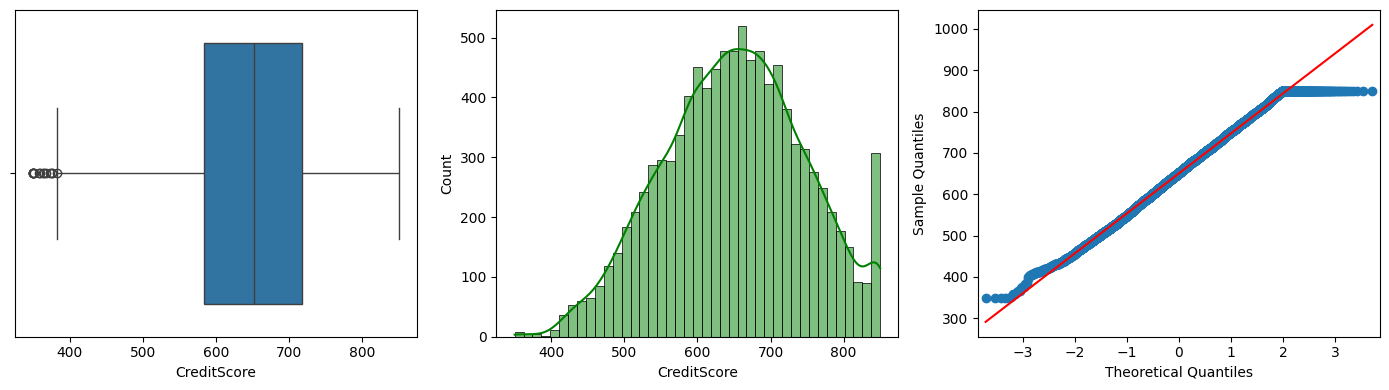

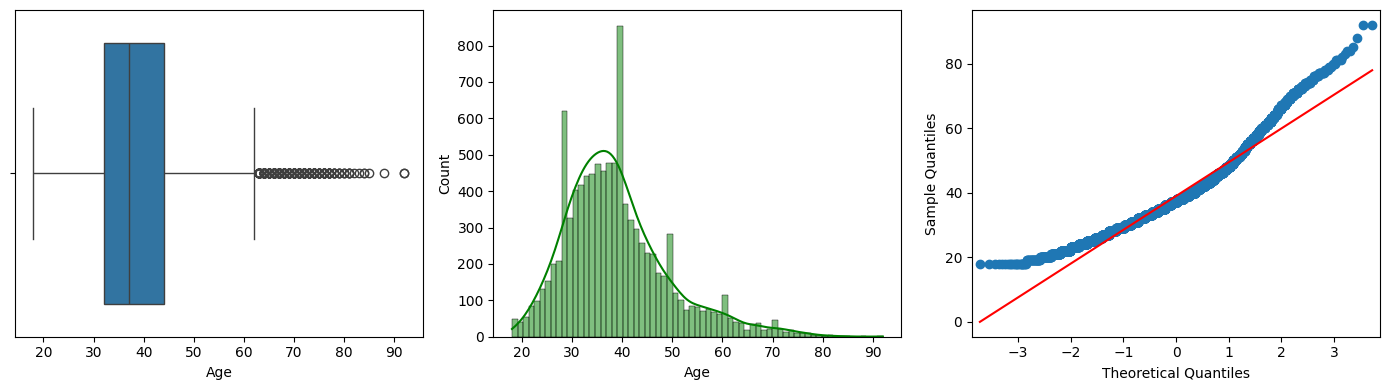

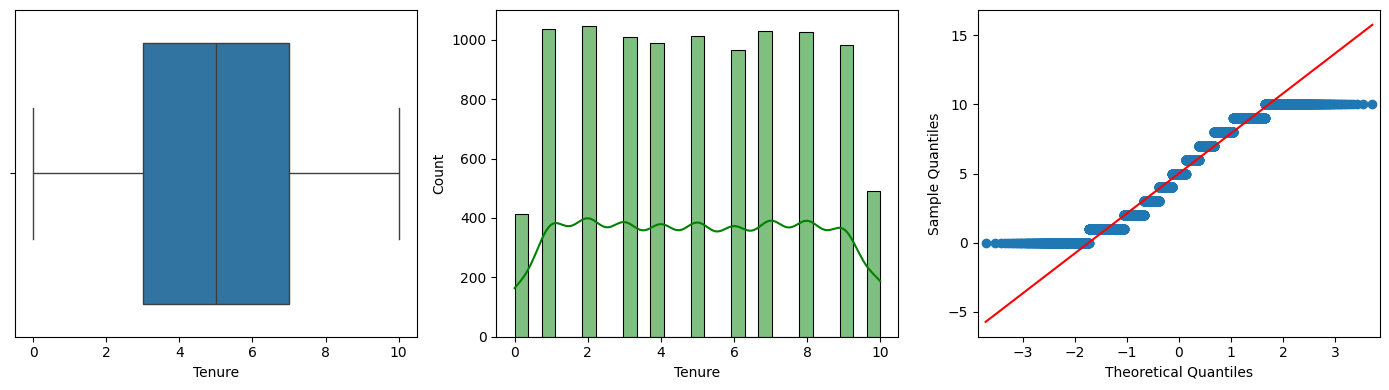

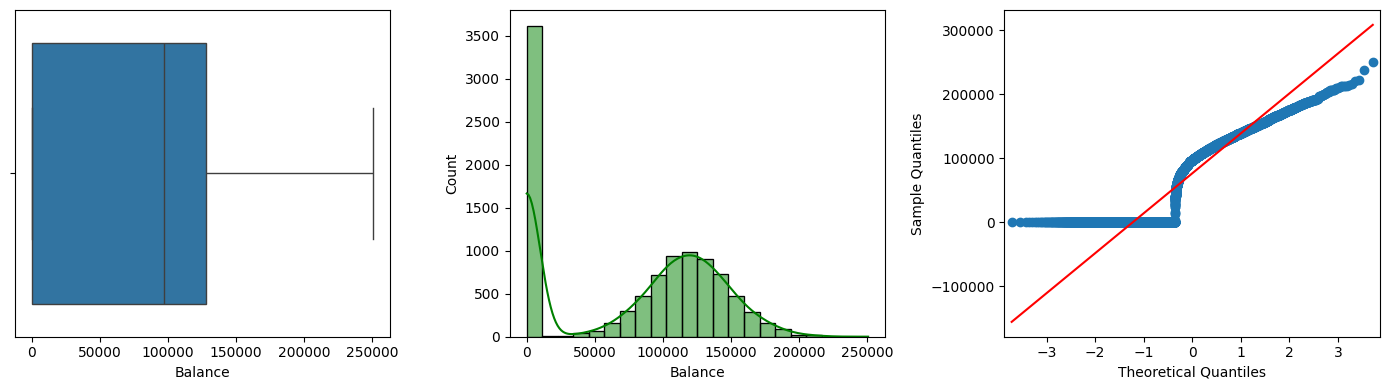

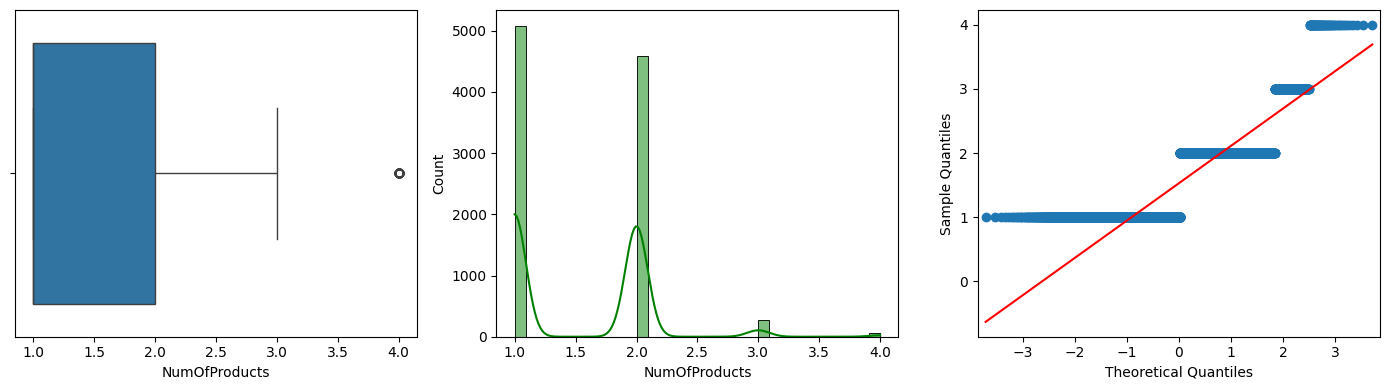

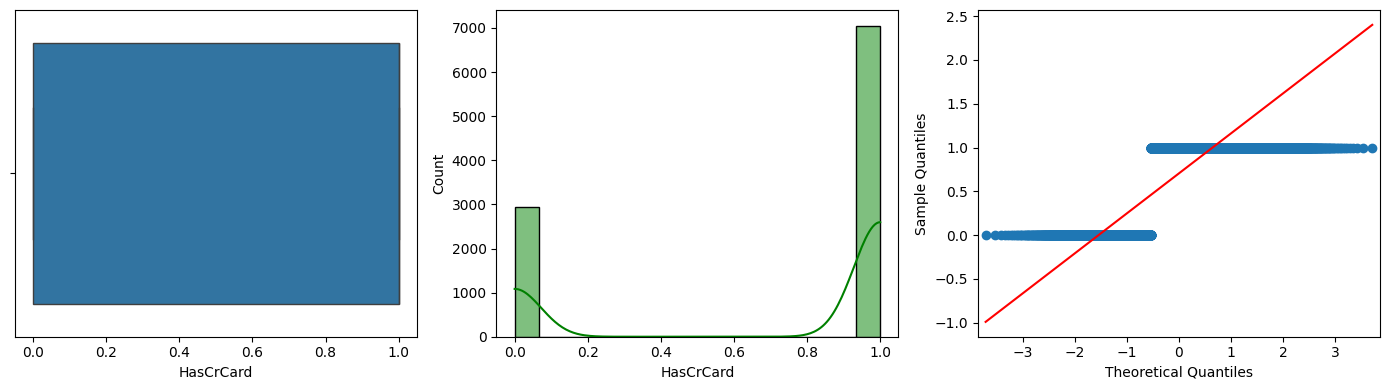

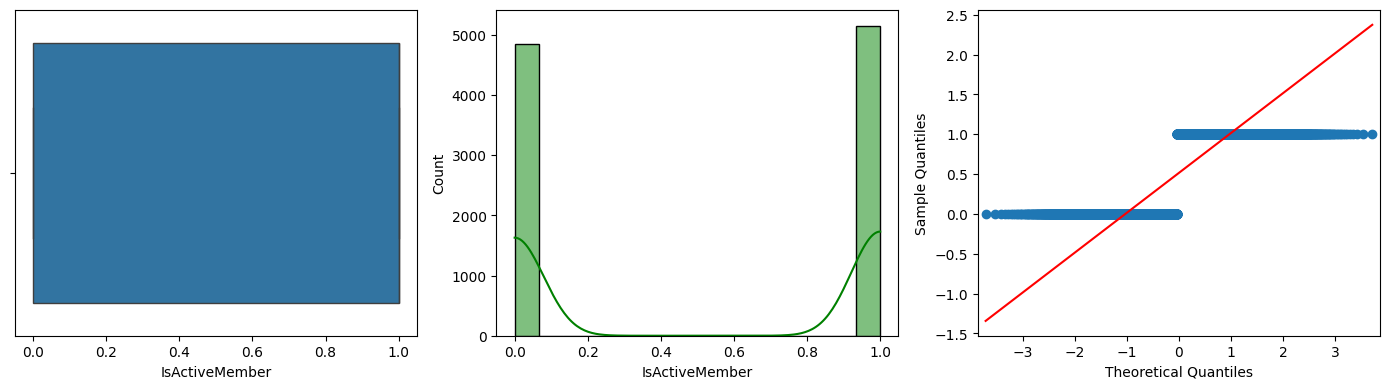

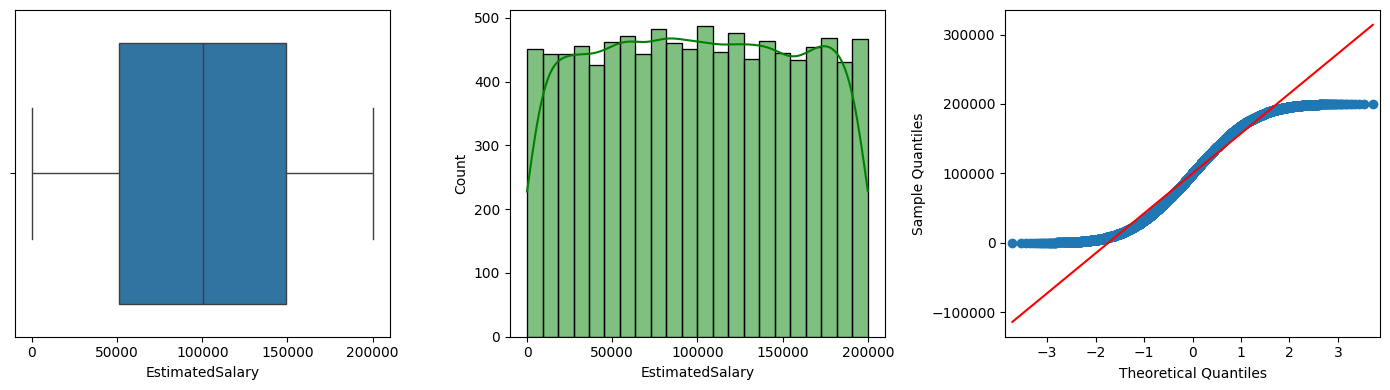

In [110]:
# Check distribution of features
from statsmodels.graphics.gofplots import qqplot

for col in num_features:
    plt.figure(figsize=(14,4))
    plt.subplot(1,3,1)
    sns.boxplot(data=X, x=col)
    plt.subplot(1,3,2)
    sns.histplot(data=X, x=col, color='green', kde= True)
    plt.subplot(1,3,3)
    ax_2 = plt.gca()
    qqplot(data=X[col], line='s', ax=ax_2)
    plt.tight_layout()

In [111]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline, make_union, Pipeline

num_transformer = make_pipeline(SimpleImputer(), StandardScaler())
cat_transformer = make_pipeline(SimpleImputer(strategy='most_frequent'),
                             OneHotEncoder(
                                 sparse_output= False,
                                 drop='if_binary',
                                 handle_unknown='ignore'
                             ))

preprocessor = make_column_transformer(
    (num_transformer, num_features),
    (cat_transformer, cat_features),
    remainder='drop'
    )

preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Geography', 'Gender'], dtype='object'))])

## 2.3 Deal with Data Imbalance: SMOTE resampling

In [112]:
y.value_counts(normalize= True)

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64

In [113]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, cross_val_predict, LearningCurveDisplay, KFold, learning_curve
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.7, random_state= 42)

X_train_preprocessed = pd.DataFrame(preprocessor.fit_transform(X_train),\
    columns=preprocessor.get_feature_names_out())

X_test_preprocessed = pd.DataFrame(preprocessor.transform(X_test),\
    columns=preprocessor.get_feature_names_out())

X_train_preprocessed_resampled, y_train_resampled = SMOTE(random_state= 42)\
    .fit_resample(X_train_preprocessed, y_train)

X_test_preprocessed_resampled, y_test_resampled = SMOTE(random_state= 42)\
    .fit_resample(X_test_preprocessed, y_test)


# 3. Baseline model

In [114]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

cv_results_dummy = cross_validate(DummyClassifier(), X_train_preprocessed_resampled, y_train_resampled,cv= 10, n_jobs= -1)
cv_results_dummy

{'fit_time': array([0.0146873 , 0.03081322, 0.02276778, 0.02232289, 0.01174617,
        0.01005745, 0.00772285, 0.00958014, 0.0077858 , 0.00519133]),
 'score_time': array([0.00563884, 0.00364447, 0.00894237, 0.00823736, 0.00327063,
        0.00373316, 0.00249219, 0.0025785 , 0.0023191 , 0.00121641]),
 'test_score': array([0.5       , 0.5       , 0.5       , 0.5       , 0.49954914,
        0.49954914, 0.49954914, 0.49954914, 0.49954914, 0.49954914])}

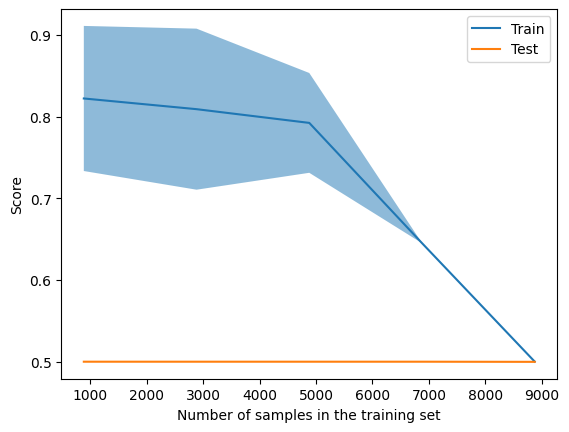

In [115]:
LearningCurveDisplay.from_estimator(DummyClassifier(), X_train_preprocessed_resampled, y_train_resampled)
# plt.ylim(0.5,1)

# 4. First Logistic Regression Model

## 4.1. Cross validation with SMOTE resampled Data 

In [116]:

cv_results_logreg = cross_validate(LogisticRegression(),
                                   X_train_preprocessed_resampled,
                                   y_train_resampled,
                                   scoring= ['accuracy', 'precision', 'recall'],
                                   cv= 5,
                                   n_jobs= -1)
cv_results_logreg

{'fit_time': array([0.0327003 , 0.03648543, 0.03352737, 0.0252111 , 0.0224576 ]),
 'score_time': array([0.02198935, 0.03184605, 0.02634573, 0.01989365, 0.01175117]),
 'test_accuracy': array([0.70121676, 0.72825597, 0.71068049, 0.71608833, 0.72182146]),
 'test_precision': array([0.70448307, 0.72899729, 0.71324201, 0.71557156, 0.73120301]),
 'test_recall': array([0.69369369, 0.72702703, 0.70423805, 0.71686204, 0.70153291])}

## 4.1. Cross validation with Logistic Regression pipeline with balanced class weight

In [117]:
pipeline_logreg = make_pipeline(preprocessor, LogisticRegression(class_weight='balanced'))
pipeline_logreg

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Geography', 'Gender'], dtype='object'))])),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced'))])

In [118]:
cv_results_logreg = cross_validate(pipeline_logreg,
                                   X_train,
                                   y_train,
                                   scoring= ['accuracy', 'precision', 'recall'],
                                   cv= 5,
                                   n_jobs= -1)
cv_results_logreg

{'fit_time': array([0.11737084, 0.11553645, 0.05327225, 0.10630894, 0.10071015]),
 'score_time': array([0.09883165, 0.0296495 , 0.02921844, 0.0278728 , 0.03630137]),
 'test_accuracy': array([0.69571429, 0.72071429, 0.71785714, 0.705     , 0.72357143]),
 'test_precision': array([0.37383178, 0.39919355, 0.40545455, 0.38011696, 0.39958592]),
 'test_recall': array([0.68728522, 0.68041237, 0.76632302, 0.67241379, 0.66551724])}

In [119]:
cv_results_logreg = cross_validate(LogisticRegression(class_weight='balanced'),
                                   X_train_preprocessed,
                                   y_train,
                                   scoring= ['accuracy', 'precision', 'recall'],
                                   cv= 5,
                                   n_jobs= -1)
cv_results_logreg

{'fit_time': array([0.02523828, 0.06863427, 0.03596425, 0.04897594, 0.03986478]),
 'score_time': array([0.02373719, 0.03503799, 0.01930666, 0.01887155, 0.0192492 ]),
 'test_accuracy': array([0.69642857, 0.72071429, 0.71785714, 0.70571429, 0.72357143]),
 'test_precision': array([0.37453184, 0.39919355, 0.40545455, 0.38085938, 0.39958592]),
 'test_recall': array([0.68728522, 0.68041237, 0.76632302, 0.67241379, 0.66551724])}

## 4.3 Compare Learning curves: Logistic Regression with and without oversampling

/home/jerome-roeser/.pyenv/versions/3.12.4/envs/case-studies/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
2 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/home/jerome-roeser/.pyenv/versions/3.12.4/envs/case-studies/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jerome-roeser/.pyenv/versions/3.12.4/envs/case-studies/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^

(0.0, 10000.0)

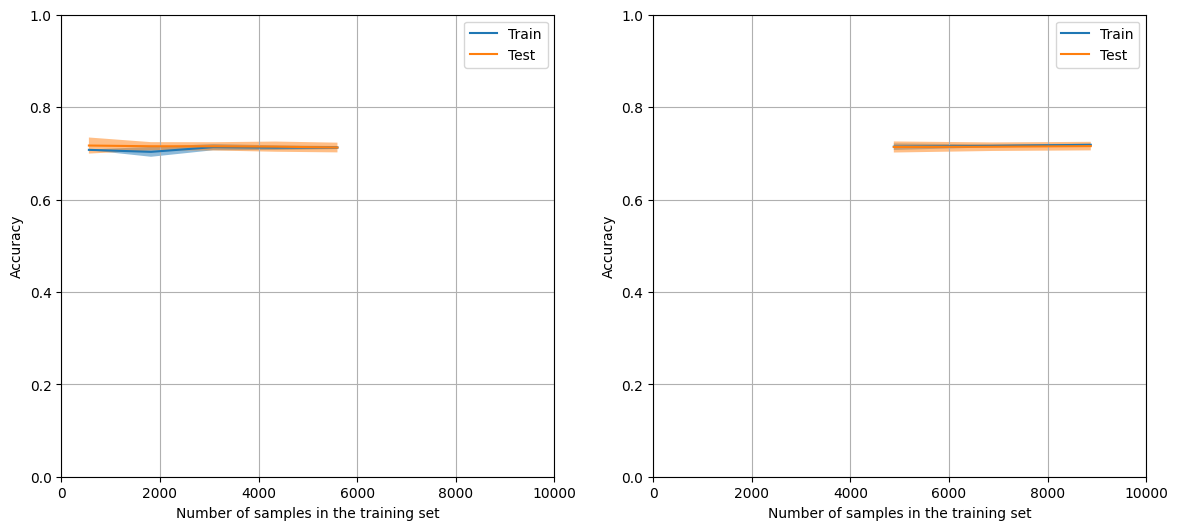

In [120]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
ax1 = plt.gca()
LearningCurveDisplay.from_estimator(pipeline_logreg,
                                    X_train,
                                    y_train ,
                                    # error_score='i',
                                    scoring='accuracy',
                                    ax=ax1)
plt.grid()
plt.ylim(0,1)
plt.xlim(0, 10_000)


plt.subplot(1,2,2)
ax1 = plt.gca()
LearningCurveDisplay.from_estimator(LogisticRegression(class_weight='balanced'),
                                    X_train_preprocessed_resampled,
                                    y_train_resampled ,
                                    # error_score='i',
                                    scoring='accuracy',
                                    ax=ax1)
plt.grid()
plt.ylim(0,1)
plt.xlim(0, 10_000)


# plt.ylim(0.5, 1)

# 5. Evaluate different Classifiers

## 5.1. Make pipeline function and quickly evaluate models

In [130]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

models =[
    DummyClassifier(),
    LogisticRegression(class_weight= 'balanced'),
    SVC(kernel='linear'),
    SVC(kernel='sigmoid'),
    SVC(kernel='rbf'),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier()
         ]

model_names = [
    'Dummy',
    'Logistic Regression',
    'SVC_linear',
    'SVC_sigmoid',
    'SVC_rbf',
    'KNeighborsClassifier',
    'DecisionTreeClassifier',
    'RandomForestClassifier',
    'GradientBoostingClassifier'
    ]

accuracy, precision, recall = [], [], []

for model, model_name in zip(models, model_names):
    print(f"Evaluating the {model_name} model (specs: {model}) ")
    pipeline = make_pipeline(preprocessor, model)
    pipeline.fit(X_train, y_train)
    accuracy.append(pipeline.score(X_test, y_test))
    recall.append(recall_score(y_test, pipeline.predict(X_test)))
    precision.append(precision_score(y_test, pipeline.predict(X_test)))

pd.DataFrame({'models': model_names,
              'accuracy_scores': accuracy,
              'precision_scores': precision,
              'recall_scores': recall})

Evaluating the Dummy model (specs: DummyClassifier()) 
Evaluating the Logistic Regression model (specs: LogisticRegression(class_weight='balanced')) 
Evaluating the SVC_linear model (specs: SVC(kernel='linear')) 


/home/jerome-roeser/.pyenv/versions/3.12.4/envs/case-studies/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jerome-roeser/.pyenv/versions/3.12.4/envs/case-studies/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Evaluating the SVC_sigmoid model (specs: SVC(kernel='sigmoid')) 
Evaluating the SVC_rbf model (specs: SVC()) 
Evaluating the KNeighborsClassifier model (specs: KNeighborsClassifier()) 
Evaluating the DecisionTreeClassifier model (specs: DecisionTreeClassifier()) 
Evaluating the RandomForestClassifier model (specs: RandomForestClassifier()) 
Evaluating the GradientBoostingClassifier model (specs: GradientBoostingClassifier()) 


,models,accuracy_scores,precision_scores,recall_scores
0,Dummy,0.805333,0.000000,0.000000
1,Logistic Regression,0.705333,0.366071,0.702055
2,SVC_linear,0.805333,0.000000,0.000000
3,SVC_sigmoid,0.682667,0.198361,0.207192
4,SVC_rbf,0.862667,0.823308,0.375000
5,KNeighborsClassifier,0.841333,0.645946,0.409247
6,DecisionTreeClassifier,0.807333,0.504950,0.523973
7,RandomForestClassifier,0.871000,0.774373,0.476027
8,GradientBoostingClassifier,0.872000,0.773224,0.484589


## 5.2. Models in-depth evaluation